1)Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2)Reading the Dataset

In [4]:
df = pd.read_csv(r"/content/Admission_Predict (1) (1).csv")

3)Analyze the Data

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


4)Handling Missing Values

In [10]:
df.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [11]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

5)Data Visualization

Univariate Analysis

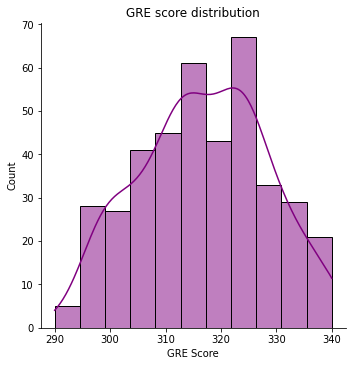

In [12]:
sns.displot(x=df["GRE Score"], kde=True, color='purple')
plt.title("GRE score distribution");

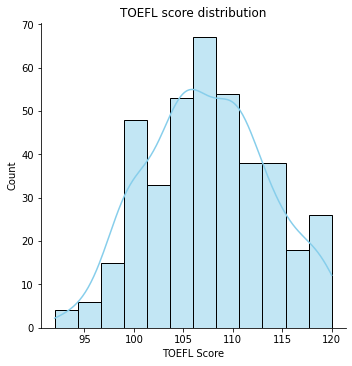

In [15]:
sns.displot(x=df["TOEFL Score"], kde=True, color='skyblue')
plt.title("TOEFL score distribution");

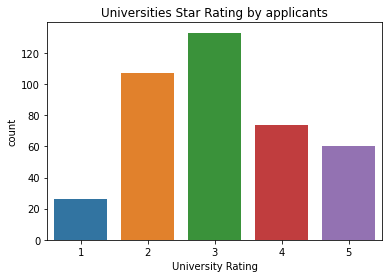

In [14]:
sns.countplot(x=df["University Rating"]);
plt.title("Universities Star Rating by applicants");

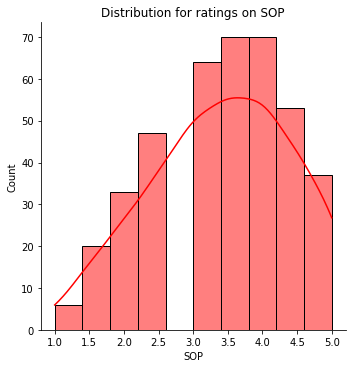

In [16]:
sns.displot(x=df["SOP"], kde=True, color='red');
plt.title("Distribution for ratings on SOP");

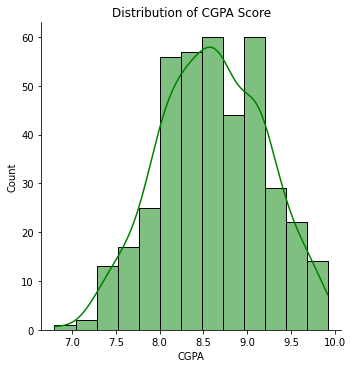

In [17]:
sns.displot(x=df["CGPA"], kde=True, color='green');
plt.title("Distribution of CGPA Score");

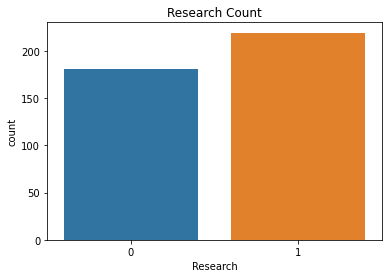

In [18]:
sns.countplot(x=df["Research"]);
plt.title("Research Count");

Bivariate Analysis

In [19]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

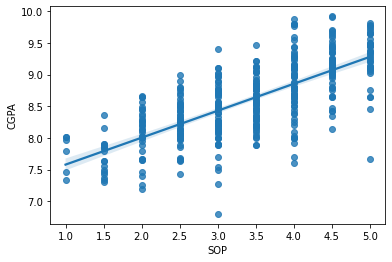

In [20]:
sns.regplot(x='SOP', y='CGPA', data=df)

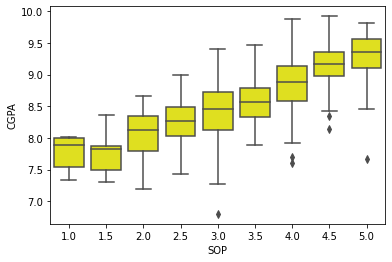

In [21]:
sns.boxplot(x='SOP',y='CGPA',data=df,color='yellow')

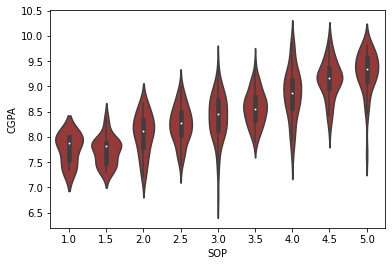

In [22]:
sns.violinplot(x='SOP',y='CGPA',data=df,color='brown')

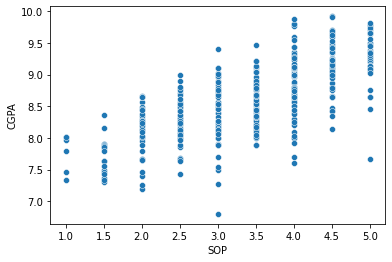

In [23]:
sns.scatterplot(x='SOP', y='CGPA', data=df)

Multi-variate Analysis

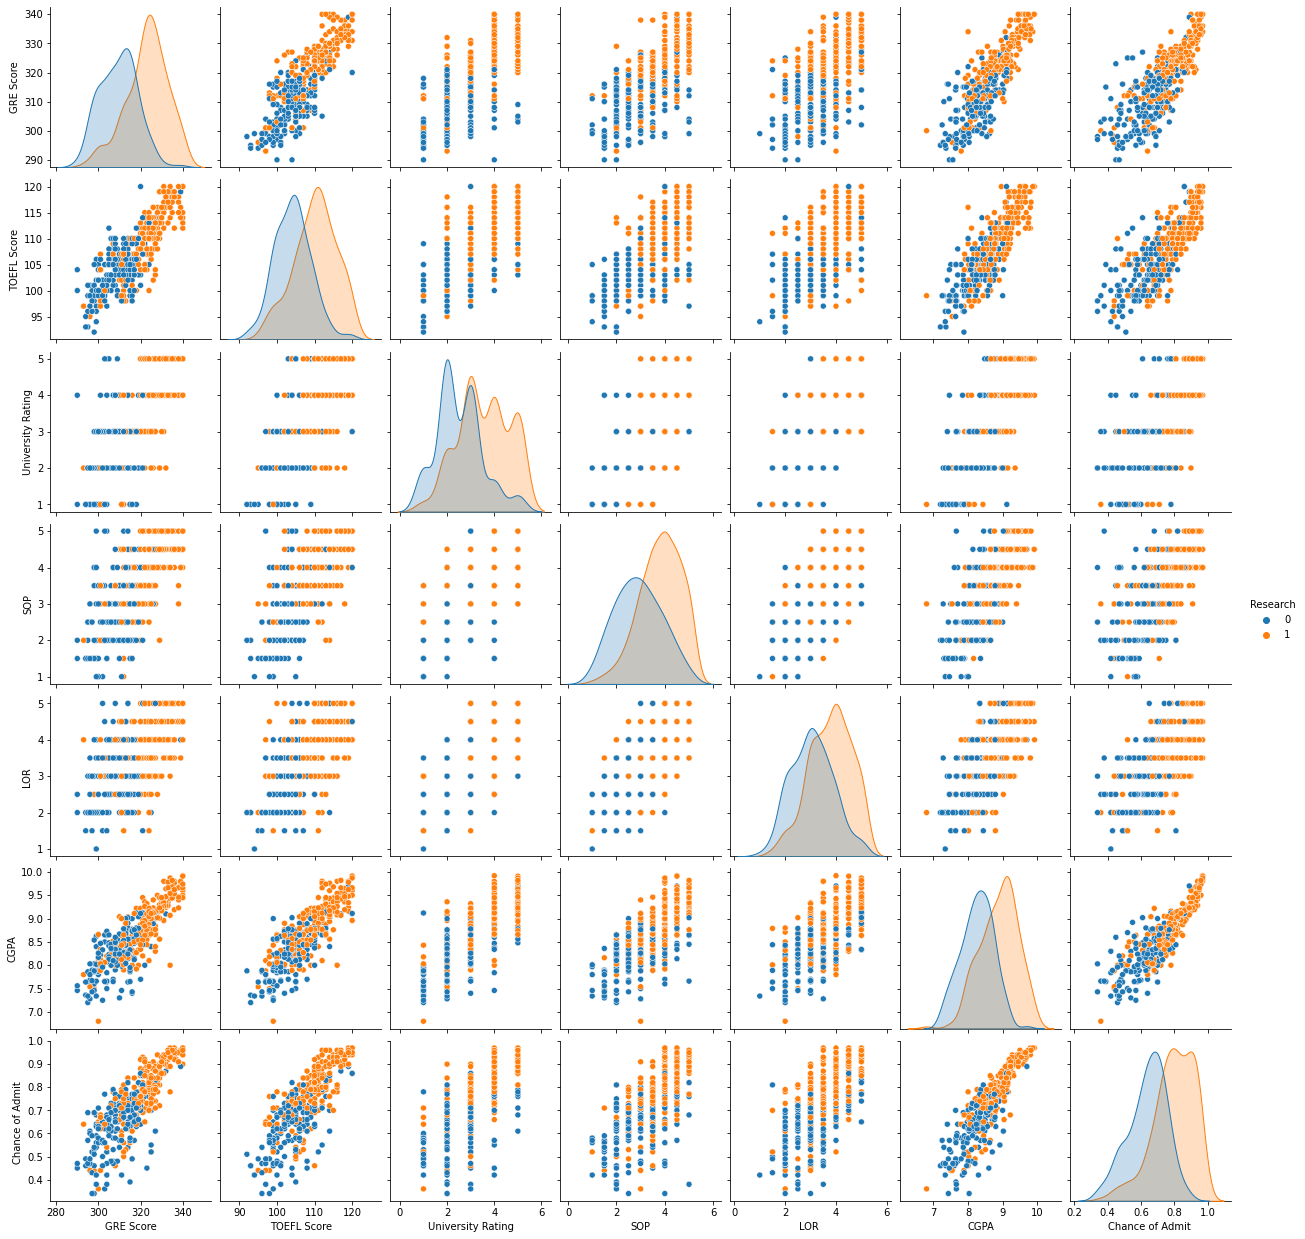

In [24]:
sns.pairplot(df,hue='Research')

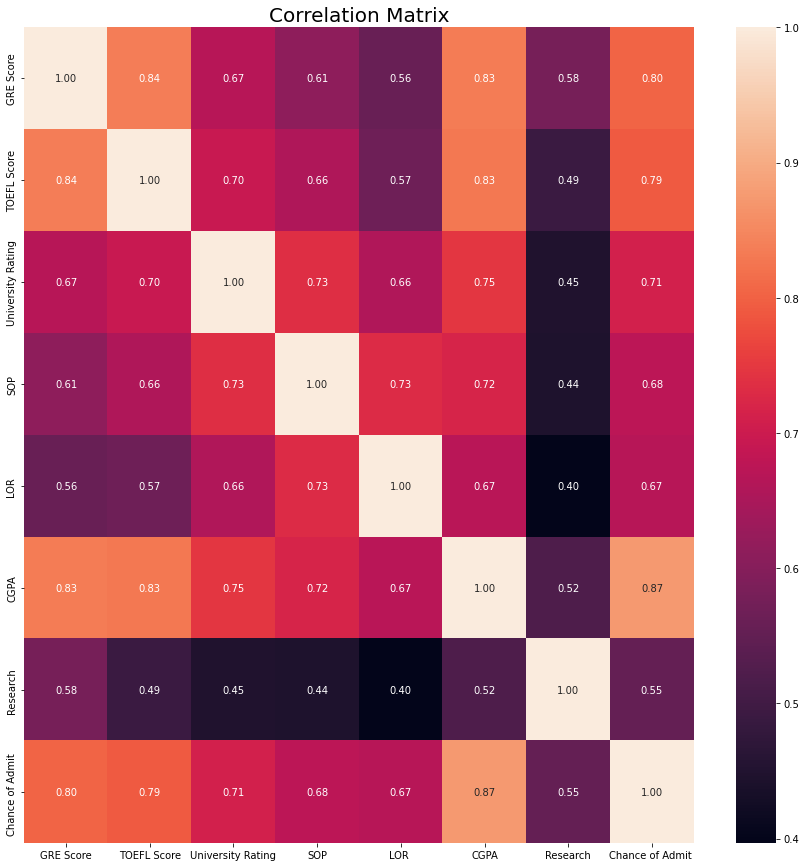

In [25]:
corr_matrix = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix,annot=True,fmt='0.2f')
plt.title("Correlation Matrix", fontsize = 20)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

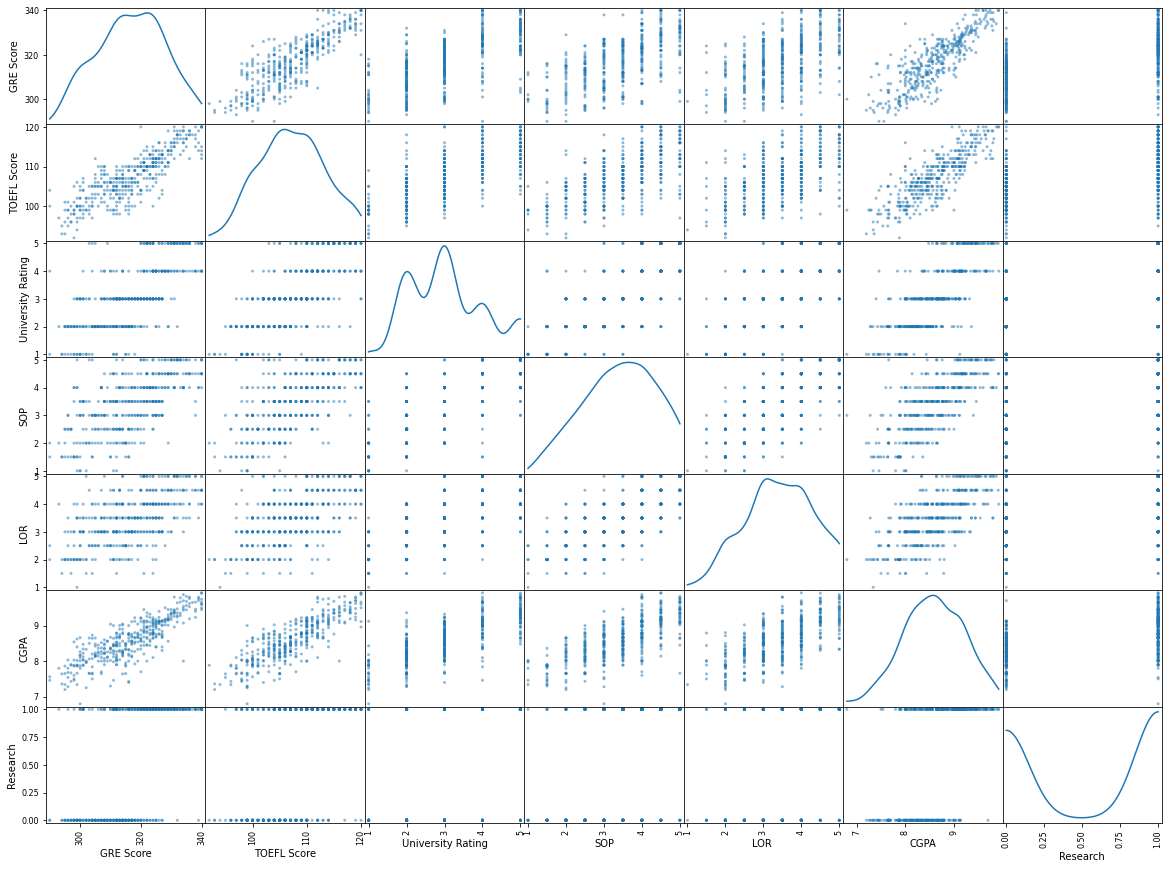

In [26]:
pd.plotting.scatter_matrix(df.loc[:,"GRE Score":"Research"],diagonal="kde",figsize=(20,15))
plt.show

6)Splitting Dependent and Independent Columns

In [27]:
x = df.iloc[:,0:7]
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


400 rows × 7 columns

In [28]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [29]:
y = df.iloc[:,7:]
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
395,0.82
396,0.84
397,0.91
398,0.67


400 rows × 1 columns

In [30]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [31]:
x.shape

(400, 7)

In [33]:
y.shape

(400, 1)

In [42]:
print(f'x contains: {x.shape[0]} rows and {x.shape[1]} columns')

x contains: 400 rows and 7 columns


In [34]:
print(f'y contains: {y.shape}')

y contains: (400, 1)


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x[x.columns] = scaler.fit_transform(x[x.columns])

7)Splitting the Data into Train and Test

In [36]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

In [37]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
124,0.22,0.500000,0.75,0.375,0.500,0.535256,0.0
93,0.22,0.178571,0.25,0.500,0.500,0.346154,1.0
335,0.70,0.678571,0.75,0.750,0.875,0.740385,1.0
197,0.40,0.500000,0.25,0.625,0.375,0.490385,0.0
271,0.18,0.142857,0.25,0.125,0.250,0.339744,0.0
...,...,...,...,...,...,...,...
217,0.62,0.607143,0.75,0.750,0.750,0.746795,1.0
329,0.14,0.142857,0.25,0.375,0.125,0.349359,0.0
362,0.96,0.821429,1.00,0.875,1.000,0.778846,1.0
119,0.74,0.428571,1.00,0.500,0.625,0.653846,1.0


In [38]:
y_train

,Chance of Admit
124,0.57
93,0.44
335,0.83
197,0.73
271,0.54
...,...
217,0.85
329,0.43
362,0.91
119,0.71


In [39]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
277,0.60,0.321429,0.25,0.375,0.500,0.583333,0.0
288,0.48,0.428571,0.75,1.000,1.000,0.711538,0.0
280,0.42,0.357143,0.50,0.875,0.750,0.589744,1.0
253,0.90,0.821429,0.75,0.875,0.875,0.923077,1.0
374,0.50,0.464286,0.25,0.250,0.375,0.272436,0.0
265,0.46,0.357143,0.50,0.375,0.375,0.602564,0.0
315,0.36,0.428571,0.25,0.375,0.500,0.407051,0.0
181,0.30,0.535714,0.25,0.375,0.375,0.519231,0.0
272,0.08,0.107143,0.00,0.125,0.125,0.269231,0.0
50,0.46,0.214286,0.50,0.375,0.875,0.480769,1.0


In [40]:
y_test

,Chance of Admit
277,0.70
288,0.82
280,0.68
253,0.93
374,0.39
265,0.71
315,0.65
181,0.71
272,0.49
50,0.76


In [41]:
y_train=(y_train>0.5)
y_train

,Chance of Admit
124,True
93,False
335,True
197,True
271,True
...,...
217,True
329,False
362,True
119,True
